In [1]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg
import phidl.utilities as pu
import layout
import numpy as np

In [2]:
chip_name = 'PD_0620'

Load process layers and save layer properties file for Klayout visualization.

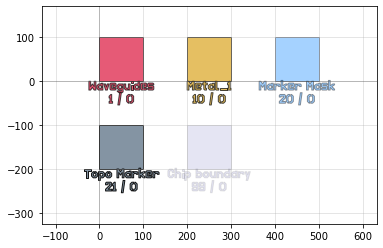

In [3]:
ls = layout.setup_layers()
P = pg.preview_layerset(ls)
qp(P)
# P.write_svg('Layers.svg')
pu.write_lyp('MyLayerSet.lyp', layerset = ls)

In [4]:
T = layout.chip(size=(9000,13000), name=chip_name, text_size=150, keepout=2000)

In [5]:
x0 = 2300
y0 = 2200
dy = 400

poling = np.array([1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.5, 4.0])

for kp in range(poling.size):
    pp = poling[kp]
    x2 = x0
    y2 = y0 + kp*dy
    T << layout.poling_region(period=pp, length=900).move([x2, y2]);
    T << layout.poling_region(period=pp, length=900).move([x2+1000, y2]);
    T << layout.poling_region(period=pp, length=900).move([x2+2000, y2]);
    T << layout.poling_region(period=pp, length=900).move([x2+3000, y2]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+1000, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+2000, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+3000, y2-150]);
    T << layout.contact_pads(size=[200,300], label='-', label_size=50).rotate(180).move([x2+4500, y2+150]);
    T << pg.rectangle([4500,50], layer=10).move([x2, y2+125])
 
y0 = y2 + dy
for kp in range(poling.size):
    pp = poling[kp]
    x2 = x0
    y2 = y0 + kp*dy
    T << layout.poling_region(period=pp, length=900, gap=5*pp).move([x2, y2]);
    T << layout.poling_region(period=pp, length=900, gap=5*pp).move([x2+1000, y2]);
    T << layout.poling_region(period=pp, length=900, gap=5*pp).move([x2+2000, y2]);
    T << layout.poling_region(period=pp, length=900, gap=5*pp).move([x2+3000, y2]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+1000, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+2000, y2-150]);
    T << layout.contact_pads(size=[300,200], label='+'+str(pp), label_size=50).move([x2+3000, y2-150]);
    T << layout.contact_pads(size=[200,300], label='-', label_size=50).rotate(180).move([x2+4500, y2+150]);
    T << pg.rectangle([4500,50], layer=10).move([x2, y2+125])

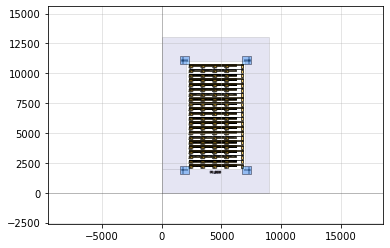

In [6]:
qp(T)

In [7]:
T.write_gds(chip_name + '.gds')

'PD_0620.gds'